Q1) Replace the NaN values with correct value. And justify why.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv("Placement_Data_Full_Class.csv")

In [2]:
# Check for missing values
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

In [3]:
dataset.drop('sl_no',inplace=True,axis=1)

In [4]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
# Replace NaN in salary with 0 
dataset.fillna({"salary": 0}, inplace=True)

In [6]:
dataset.isnull().sum()

gender            2
ssc_p             2
ssc_b             2
hsc_p             2
hsc_b             2
hsc_s             2
degree_p          2
degree_t          2
workex            2
etest_p           2
specialisation    2
mba_p             2
status            2
salary            0
dtype: int64

In [7]:
for col in ['gender', 'degree_t', 'specialisation', 'status', 'workex', 'hsc_b', 'hsc_s', 'ssc_b']:
    dataset.fillna({col: dataset[col].mode()[0]}, inplace=True)

In [8]:
dataset.isnull().sum()

gender            0
ssc_p             2
ssc_b             0
hsc_p             2
hsc_b             0
hsc_s             0
degree_p          2
degree_t          0
workex            0
etest_p           2
specialisation    0
mba_p             2
status            0
salary            0
dtype: int64

In [9]:
for col in ['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p']:
    dataset.fillna({col: dataset[col].median()}, inplace=True)

In [10]:
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
# Use Visualization/Statistics to Choose Mean vs Median

Q2) How many of them are not placed?

In [12]:
not_placed_count = dataset[dataset['status'] == 'Not Placed'].shape[0]
print("Number of students not placed:", not_placed_count)

Number of students not placed: 67


In [13]:
#This gives the count of all students who didn’t get placement.
#It helps in understanding the proportion of non-placed candidates in dataset.
#.shape attribute returns a tuple of (rows, columns).

#Example: if there are 67 students not placed and 10 columns,
#.shape will return (67, 10).

#.shape[0] This picks the first value (rows) from that tuple.

#number of rows = number of not placed students.

Q3) Find the reason for non placement from the dataset?

In [14]:
print("\nAverage scores for Placed vs Not Placed:\n") 
dataset.groupby('status')[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()


Average scores for Placed vs Not Placed:



,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.58791,61.612836
Placed,71.658533,69.860867,68.704000,73.20820,62.571667


In [15]:
## Compare average scores of placed vs not placed

#By comparing averages, we can identify which academic score is lower for “Not Placed” students.

#For example, if their etest_p and mba_p are lower — aptitude and MBA performance could be reasons for not getting placed.

Q4) What kind of relation between salary and mba_p

In [16]:
dataset.cov(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,116.143773,59.793303,42.500971,37.313591,24.309542,8.939584e+05
hsc_p,59.793303,117.672421,34.501942,35.146789,22.350398,7.587218e+05
degree_p,42.500971,34.501942,53.650961,21.730156,17.113039,4.614995e+05
etest_p,37.313591,35.146789,21.730156,174.630176,16.733421,3.826829e+05
mba_p,24.309542,22.350398,17.113039,16.733421,33.714008,1.255836e+05
salary,893958.364695,758721.826464,461499.535544,382682.877838,125583.645460,2.409752e+10


In [17]:
#A covariance of 125583.645460 between Salary and MBA percentage indicates covariance is positive
#That Salary and mba_p tend to move in the same direction. 
#When a person's mba_p value is higher than average, their salary also tends to be higher than average. 
#Similarly, when their mba_p value is lower than average, their salary also tends to be lower than average.

In [18]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511467,0.538409,0.262005,0.388484,0.534359
hsc_p,0.511467,1.000000,0.434228,0.245182,0.354848,0.450567
degree_p,0.538409,0.434228,1.000000,0.224499,0.402377,0.405879
etest_p,0.262005,0.245182,0.224499,1.000000,0.218082,0.186549
mba_p,0.388484,0.354848,0.402377,0.218082,1.000000,0.139329
salary,0.534359,0.450567,0.405879,0.186549,0.139329,1.000000


In [19]:
#A correlation of 0.139329 between Salary and MBA percentage indicates a very weak, positive linear relationship

#The absolute value of 0.139329 is very close to 0, which means there is almost no linear relationship between the two variables.

Q5) Which specialization is getting minimum salary?

In [20]:
dataset[dataset['salary'] > 0].groupby('specialisation')['salary'].mean()

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

In [21]:
#The specialization of Mkt&HR has the lowest mean salary.

#Hence Mkt&HR getting minimum salary.

Q6) How many of them getting above 500000 salary?

In [22]:
count_above_5L = dataset[dataset['salary'] > 500000].shape[0]
print("Students with salary > 500000:", count_above_5L)

Students with salary > 500000: 3


In [23]:
#3 students earning above 500000 salary

Q7) Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [24]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=100.33226296639641, pvalue=2.2444909488516516e-21)

In [25]:
#p value is less than 0.05
#Hence reject Null hypothesis and accept Alternate hypothsis
#H0- There is no similarity between etest pass mark & mba pass mark. 
#H1- There is similarity between etest pass mark & mba pass mark. 

Q8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [26]:
import scipy.stats as stats

sci_tech = dataset[(dataset['degree_t'] == 'Sci&Tech') & (dataset['salary'] > 0)]['salary']
mkt_hr = dataset[(dataset['specialisation'] == 'Mkt&HR') & (dataset['salary'] > 0)]['salary']

f_stat, p_val = stats.f_oneway(sci_tech, mkt_hr)
print("F-value:", f_stat)
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject Null Hypothesis - There is no similarity between groups")
else:
    print("Reject Alternate Hypothesis - There is a similarity between groups")

F-value: 7.4768950210499785
p-value: 0.007496896218767016
Reject Null Hypothesis - There is no similarity between groups


In [27]:
#At 5% significance:

#p < 0.05: There is no similarity between Sci&Tech and Mkt&HR.

In [28]:
#A two-way ANOVA needs:

#Two independent variables (factors)
#Example:

#Factor 1 → degree_t (with multiple levels: Sci&Tech, Comm&Mgmt, Others)

#Factor 2 → specialisation (with multiple levels: Mkt&HR, Mkt&Fin)

#To perform ANOVA, each factor must have more than one category — otherwise, there’s no “variance between groups” to analyze.

Q9) Convert the normal distribution to standard normal distribution for salary column

C:\Users\GOWTHAM\AppData\Local\Temp\ipykernel_21184\1216716711.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


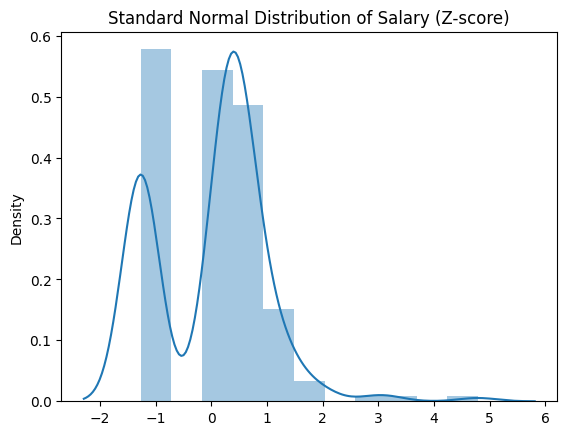

In [29]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)
    plt.title("Standard Normal Distribution of Salary (Z-score)")

    sum(z_score)/len(z_score)
    #z_score.std()

stdNBgraph(dataset["salary"])

In [30]:
#Z-score normalization converts salary values into a mean of 0 and standard deviation of 1.

#It helps compare salaries on a common scale, removing unit differences.

#A Z-score of +1 means 1 standard deviation above average salary,
#while -1 means below average.

Q10) What is the probability Density Function of the salary range from 700000 to 900000?

In [31]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\GOWTHAM\AppData\Local\Temp\ipykernel_21184\132380739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=196870.968, Standard Deviation=155233.760
The area between range(700000,900000):0.0005923853374033742


0.0005923853374033742

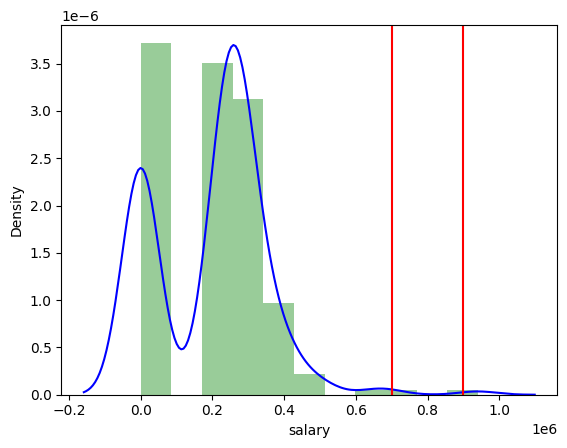

In [32]:
get_pdf_probability(dataset["salary"],700000,900000)

In [33]:
#The area under the curve between 700k–900k represents the probability of salaries falling in that range.
#PDF is 0.0005923853374033742

Q11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

Dependant Sample-Paired T_Test Same Group(degree_t(Sci&Tech)) but Different Condition(etest_p,mba_p)

In [34]:
from scipy.stats import ttest_rel
degree = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
degree1 = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(degree, degree1)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

In [35]:
#At 5% significance:

#p < 0.05: There is no similarity between degree_t with repect to etest pass mark & mba pass mark

Q12) Which parameter is highly correlated with salary?

In [36]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511467,0.538409,0.262005,0.388484,0.534359
hsc_p,0.511467,1.000000,0.434228,0.245182,0.354848,0.450567
degree_p,0.538409,0.434228,1.000000,0.224499,0.402377,0.405879
etest_p,0.262005,0.245182,0.224499,1.000000,0.218082,0.186549
mba_p,0.388484,0.354848,0.402377,0.218082,1.000000,0.139329
salary,0.534359,0.450567,0.405879,0.186549,0.139329,1.000000


In [37]:
#The variable with the highest positive correlation is most associated with salary.
#salary_z & salary are highly correlated with salary

Q13) plot any useful graph and explain it

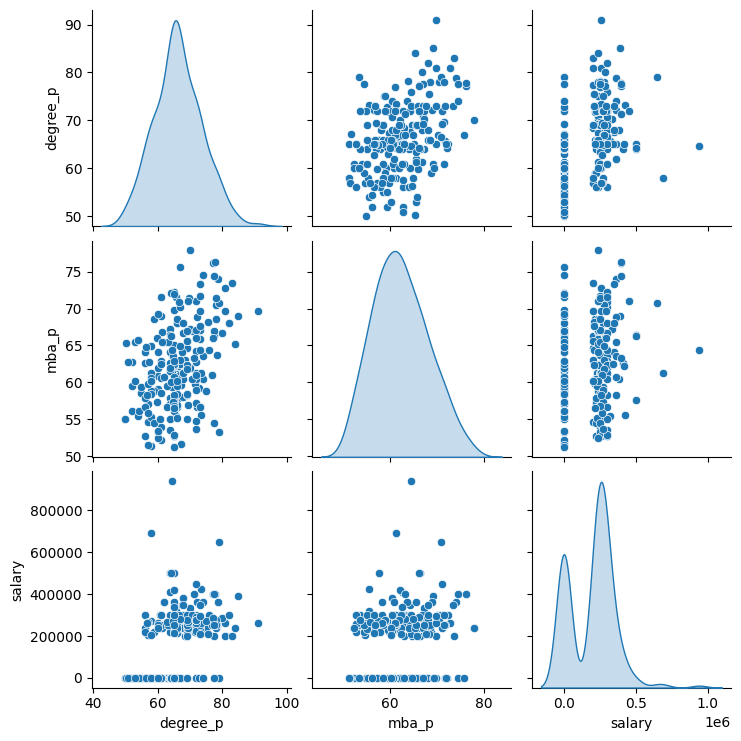

In [38]:
import seaborn as sns
sns.pairplot(dataset[['degree_p','mba_p','salary']], diag_kind='kde')
plt.savefig("my_graph.png")
plt.show()